# Week 2: Implementing Callbacks in TensorFlow using the MNIST Dataset

In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy and stops once this threshold is achieved. In the lecture you saw how this was done for the loss but here you will be using accuracy instead.

Some notes:
1. Your network should succeed in less than 9 epochs.
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!" and stop training.
3. If you add any additional variables, make sure you use the same names as the ones used in the class. This is important for the function signatures (the parameters and names) of the callbacks.

In [1]:
import tensorflow as tf
from tensorflow import keras

Visualizing the data

LABEL: 3

IMAGE PIXEL ARRAY:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.

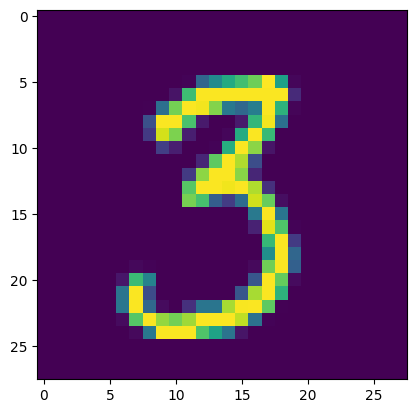

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 6632

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {y_train[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {x_train[index]}')

# Visualize the image
plt.imshow(x_train[index])

Loading the train and test data. Keras has in built dataset for the mnist digits classification task ith files mnist.npz

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
        
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

Creating custom callback to stop training of 99% accuracy is reached

In [7]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:                 
                print("\nReached 99% accuracy so cancelling training!")
                
                # Stop training once the above condition is met
                self.model.stop_training = True


Creating and training a model with 10 epochs and callbacks

Architecture of the model:
1. Flatten layer
2. Dense layer with 128 neurons and relu activation function
3. Dense (output) layer with 10 neurons and softmax activation function

In [35]:
def train_mnist(x_train, y_train):
    callbacks = myCallback()
    
    # Define the model
    model = tf.keras.models.Sequential([         
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]) 
    
    # Compile the model
    model.compile(optimizer='adam',                   
                  loss='sparse_categorical_crossentropy',                   
                  metrics=['accuracy'])     
    
    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

    return model, history

Call the `train_mnist` passing in the appropiate parameters to get the training history:

In [36]:
# grader-required-cell

model, hist = train_mnist(x_train, y_train)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2003 - accuracy: 0.9409
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0796 - accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0356 - accuracy: 0.9887
Epoch 5/10
1847/1875 [============================>.] - ETA: 0s - loss: 0.0267 - accuracy: 0.9915
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0268 - accuracy: 0.9914


#### Results on training data:

- For hidden layer with 128 neurons, the accuracy is 0.9908 and loss is 0.0303. Epochs 7/10. Time per epoch: 2 secs
- For hidden layer with 256 neurons, the accuracy is 0.9901 and loss is 0.0320. Epochs 5/10. Time per epoch: 2 secs
- For hidden layer with 512 neurons, the accuracy is 0.9908 and loss is 0.0283. Epochs 5/10. Time per epoch: 3.5 secs
- For hidden layer with 1024 neurons, the accuracy is 0.9917 and loss is 0.0259. Epochs 5/10. Time per epoch: 5 secs


Evaluating model's performance on testing dataset

In [39]:
# Evaluate the model on unseen data
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 873us/step - loss: 0.0807 - accuracy: 0.9777


[0.08068489283323288, 0.9776999950408936]

#### Results on testing data

- For hidden layer with 128 neurons, the accuracy is 0.9666 and loss is 0.1076.
- For hidden layer with 256 neurons, the accuracy is 0.9793 and loss is 0.0685.
- For hidden layer with 512 neurons, the accuracy is 0.9803 and loss is 0.0681.
- For hidden layer with 1024 neurons, the accuracy is 0.9824 and loss is 0.06699.

Creating classification for all test images

313/313 [==============================] - 0s 1ms/step
[4.08910766e-10 1.93305527e-09 1.66289658e-06 1.44610249e-05 1.14615652e-12 2.80919021e-09 2.07805710e-14 9.99983788e-01 3.22502025e-08 1.05304764e-07]


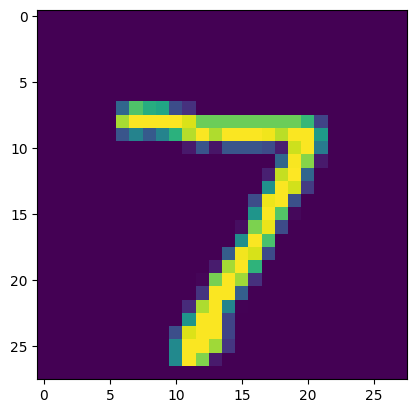

In [40]:
classifications = model.predict(x_test)

index = 0
plt.imshow(x_test[index])
print(classifications[index])